#### Own Linear discriminant analysis ALgorithm

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def my_lda(data, y):
    n = data.shape[1]
    mean_vectors = []
    for cl in range(0,2):
        mean_vectors.append(np.mean(data[y==cl], axis=0))
    #print('Mean Vector class %s: %s\n' %(cl, mean_vectors[cl]))
    scatter_within = np.zeros((n,n))
    for cl,mv in enumerate(mean_vectors):
        scatter_within_class = np.zeros((n,n)) # scatter matrix for every class
        for x in data[y==cl]:
            x, mv = x.reshape(n,1), mv.reshape(n,1) # make column vectors
            scatter_within_class += (x-mv).dot((x-mv).T)
        scatter_within += scatter_within_class # sum class scatter matrices
    whole_mean = np.mean(data, axis=0)
    scatter_between = np.zeros((n,n))

    for cl,mv in enumerate(mean_vectors):  
        N = data[y==cl].shape[0] #data[y==i,:]
        mv, whole_mean = mv.reshape(n,1), whole_mean.reshape(n,1)# make column vector
        scatter_between += N * (mv - whole_mean).dot((mv - whole_mean).T)

    scatter_within_inverse = np.linalg.inv(scatter_within)
    w_intermediate = np.dot(scatter_within_inverse, scatter_between)
    eig_vals, eig_vecs = np.linalg.eig(w_intermediate)
#     print('Eigenvalues \n%s' % eig_vals)
    eigenIndexes=eig_vals.argsort()[::-1]
    eig_vals = eig_vals[eigenIndexes]
    eig_vecs = eig_vecs[:, eigenIndexes]
    w = eig_vecs[:,:len(np.unique(y))-1]
    Y = data.dot(w)
    return Y, w


In [3]:
dataset = pd.read_csv("D:\ML\hw2\dataset.csv")
#Given '0' to NSCLC & '1' to SCLC (CLASS LABELS)
dataset["Unnamed: 0"] = dataset["Unnamed: 0"].apply(lambda x : 0 if x.startswith("NSCLC") else 1)
data = dataset.values
target = data[:,0]
x = data[:,1:]
Y,w = my_lda(x, target)

#### LDA with sklearn

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(x,target)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

#### plot lda with sklearn to compare and verify the results with own LDA

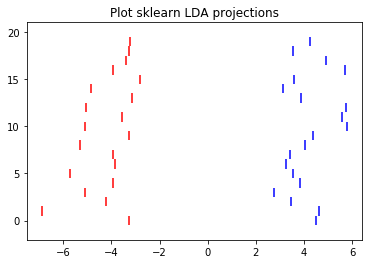

In [5]:
plt.figure()
plt.eventplot(lda.transform(x)[20:], orientation="horizontal", color="b")
plt.eventplot(lda.transform(x)[:20], orientation="horizontal", color="r")
plt.title("Plot sklearn LDA projections")
plt.show()

#### plot Own LDA 

C:\Users\erank\Anaconda2\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


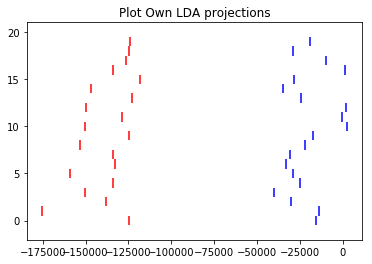

In [6]:
plt.figure()
plt.hlines(1,1,20)
plt.eventplot(np.dot(x, -w)[20:], orientation="horizontal", color="b")
plt.eventplot(np.dot(x, -w)[:20], orientation="horizontal", color="r")
plt.title("Plot Own LDA projections")
plt.show()

#### Both the plots are similar, hence verified that my algorithm is giving ouput similar to sklearn.

#### Scatter plot

C:\Users\erank\Anaconda2\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


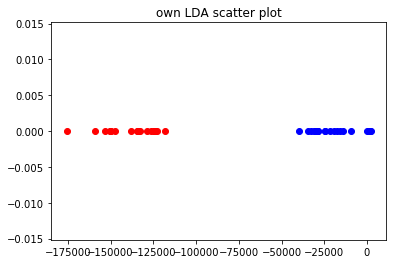

In [7]:
#Own LDA Scatter plot
plt.scatter(np.dot(x, -w)[20:], np.zeros(20), c='b')
plt.scatter(np.dot(x, -w)[:20], np.zeros(20), c='r')
plt.title("own LDA scatter plot")

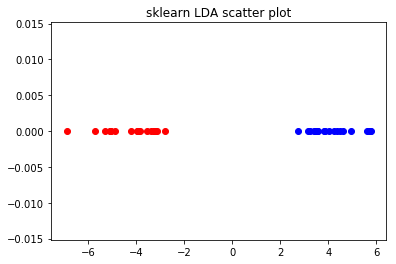

In [8]:
#sklearn LDA scatter plt
plt.scatter(lda.transform(x)[20:], np.zeros(20), c='b')
plt.scatter(lda.transform(x)[:20], np.zeros(20), c='r')
plt.title("sklearn LDA scatter plot")

In [9]:
#Own LDA algorithm scatter plot is same as sklearn LDA. Hence verified.

#### sklearn lda with eigen values

In [10]:
lda2 = LinearDiscriminantAnalysis(solver="eigen")
lda2.fit(x,target)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='eigen', store_covariance=False, tol=0.0001)

In [12]:
lda2.transform(x)

array([[ -1.24442678e+05],
       [ -1.75335149e+05],
       [ -1.38036885e+05],
       [ -1.50052457e+05],
       [ -1.34023449e+05],
       [ -1.59189090e+05],
       [ -1.32992994e+05],
       [ -1.34277700e+05],
       [ -1.52999674e+05],
       [ -1.24615045e+05],
       [ -1.50191438e+05],
       [ -1.28925155e+05],
       [ -1.49771614e+05],
       [ -1.23048708e+05],
       [ -1.47125835e+05],
       [ -1.18233803e+05],
       [ -1.34034716e+05],
       [ -1.26477194e+05],
       [ -1.24489418e+05],
       [ -1.23922666e+05],
       [ -1.56074533e+04],
       [ -1.39087580e+04],
       [ -3.02034637e+04],
       [ -3.99816297e+04],
       [ -2.48355018e+04],
       [ -2.88834290e+04],
       [ -3.30116059e+04],
       [ -3.08934010e+04],
       [ -2.19135686e+04],
       [ -1.74617190e+04],
       [  2.28182937e+03],
       [ -1.58675246e+02],
       [  1.99465166e+03],
       [ -2.44801383e+04],
       [ -3.45952702e+04],
       [ -2.86354458e+04],
       [  1.19369953e+03],
 

In [17]:
#As we can see sklearn eigen values and own algorithm eigen values matched.
np.dot(x,-w)

array([[ -1.24442678e+05+0.j],
       [ -1.75335149e+05+0.j],
       [ -1.38036885e+05+0.j],
       [ -1.50052457e+05+0.j],
       [ -1.34023449e+05+0.j],
       [ -1.59189090e+05+0.j],
       [ -1.32992994e+05+0.j],
       [ -1.34277700e+05+0.j],
       [ -1.52999674e+05+0.j],
       [ -1.24615045e+05+0.j],
       [ -1.50191438e+05+0.j],
       [ -1.28925155e+05+0.j],
       [ -1.49771614e+05+0.j],
       [ -1.23048708e+05+0.j],
       [ -1.47125835e+05+0.j],
       [ -1.18233803e+05+0.j],
       [ -1.34034716e+05+0.j],
       [ -1.26477194e+05+0.j],
       [ -1.24489418e+05+0.j],
       [ -1.23922666e+05+0.j],
       [ -1.56074533e+04+0.j],
       [ -1.39087580e+04+0.j],
       [ -3.02034637e+04+0.j],
       [ -3.99816297e+04+0.j],
       [ -2.48355018e+04+0.j],
       [ -2.88834290e+04+0.j],
       [ -3.30116059e+04+0.j],
       [ -3.08934010e+04+0.j],
       [ -2.19135686e+04+0.j],
       [ -1.74617190e+04+0.j],
       [  2.28182937e+03+0.j],
       [ -1.58675246e+02+0.j],
       [

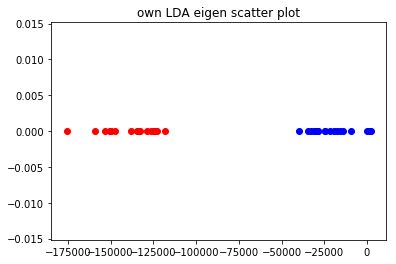

In [18]:
plt.scatter(np.dot(x, -w)[20:], np.zeros(20), c='b')
plt.scatter(np.dot(x, -w)[:20], np.zeros(20), c='r')
plt.title("own LDA eigen scatter plot")

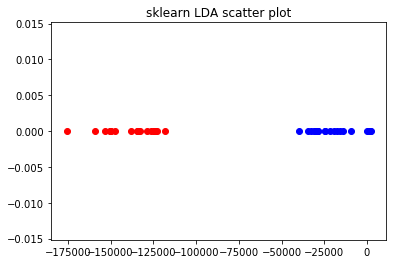

In [19]:
plt.scatter(lda2.transform(x)[20:], np.zeros(20), c='b')
plt.scatter(lda2.transform(x)[:20], np.zeros(20), c='r')
plt.title("sklearn LDA scatter plot")

In [20]:
##  Both the sklearn scatter plot and own lda algo plot matched.